In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re


import warnings
warnings.filterwarnings('ignore')

### Using header=1 to remove the 1st row index named as "Bejaia Region Dataset"

In [22]:
df=pd.read_csv("D:\INeuron\Full Stack data science\Coding\ML\Job_Project\Algerian_forest_fires_dataset.csv",header=1)
df.head()

,day,month,year,Temperature#,RH!,Ws@,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### DATASET INFORMATION

The dataset includes 244 instances that regroup a data of two regions of Algeria:
    
      *  Bejaia region located in the northeast of Algeria
      *  Sidi Bel-abbes region located in the northwest of Algeria

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into as fired (138 classes) and as not fired (106 classes) classes.

### VARIABLE INFORMATION

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) 

#### Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8

#### FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely as fired and as not fired.

# EDA

In [23]:
df.head()

,day,month,year,Temperature#,RH!,Ws@,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### To strip the extra space or characters in the column names

In [24]:
df.columns=[re.sub('[`,~,!,@,#,$,%,6,&,*, ]',"",i) for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [27]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [28]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_with_na

['month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [34]:
for feature in feature_with_na:
    print(f'The feature {feature} has',round(df[feature].isnull().mean()*100,2),f"% of null values")

The feature month has 0.41 % of null values
The feature year has 0.41 % of null values
The feature Temperature has 0.41 % of null values
The feature RH has 0.41 % of null values
The feature Ws has 0.41 % of null values
The feature Rain has 0.41 % of null values
The feature FFMC has 0.41 % of null values
The feature DMC has 0.41 % of null values
The feature DC has 0.41 % of null values
The feature ISI has 0.41 % of null values
The feature BUI has 0.41 % of null values
The feature FWI has 0.41 % of null values
The feature Classes has 0.81 % of null values


In [52]:
df_temp=df.copy()
feature_without_na=df_temp.dropna(axis=0)
feature_without_na.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [53]:
df.shape

(246, 14)

In [54]:
feature_without_na.shape

(244, 14)

# Data Type conversion 

In [59]:
feature_without_na.drop(index=123,axis=0,inplace=True)
feature_without_na.shape

(243, 14)

In [79]:
date_mon_yr=feature_without_na.iloc[:,:3]
target_feature=feature_without_na.iloc[:,-1]
ip_feature=feature_without_na.iloc[:,3:-1]

In [81]:
ip_feature.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


<Axes: >

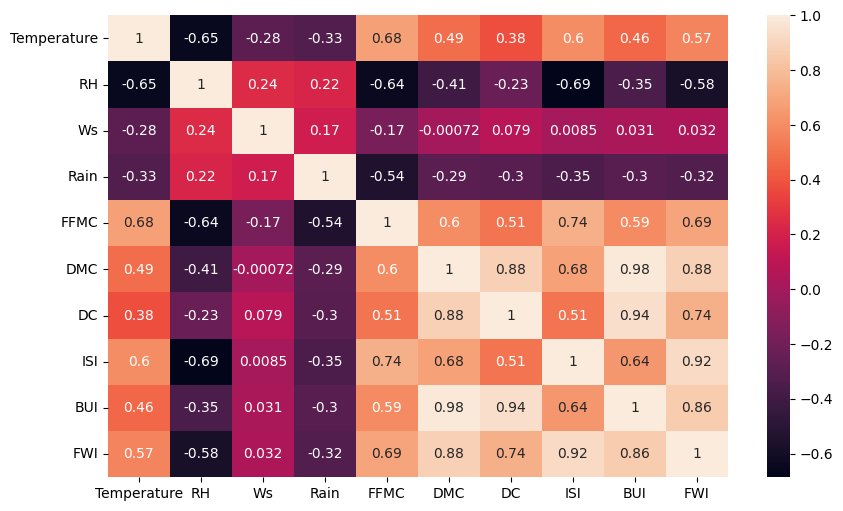

In [109]:
fig, ax =plt.subplots(figsize=(10,6))
sns.heatmap(ip_feature.corr(),annot=True,ax=ax)

# Remove the columns which are highly collinear

In [110]:
ip_feature.drop(columns=['DMC','DC'],axis=1,inplace=True)
ip_feature.head()

,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,FWI
0,29,57,18,0,65.7,1.3,3.4,0.5
1,29,61,13,1.3,64.4,1,3.9,0.4
2,26,82,22,13.1,47.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,0,1.7,0
4,27,77,16,0,64.8,1.2,3.9,0.5


In [116]:
import sklearn

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(ip_feature,target_feature,test_size=0.3,random_state=42)

In [131]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic_model=logistic.fit(X_train,y_train)


In [134]:
pred=logistic_model.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.9178082191780822

In [184]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
accuracy_score(y_test,DT_pred)

0.9315068493150684

In [185]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF_model=RF.fit(X_train,y_train)
RF_pred=RF_model.predict(X_test)
accuracy_score(y_test,RF_pred)

0.9315068493150684

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB_model=GB.fit(X_train,y_train)
GB_pred=GB_model.predict(X_test)
accuracy_score(y_test,GB_pred)

0.9452054794520548

In [187]:
from sklearn.linear_model import RidgeClassifier

Ridge=RidgeClassifier()
Ridge_model=Ridge.fit(X_train,y_train)
Ridge_pred=Ridge_model.predict(X_test)
accuracy_score(y_test,Ridge_pred)

0.8904109589041096

In [ ]:
from sklearn.linear_model import Lasso

Las=Lasso(alpha=0.1)
Las_model=Las.fit(X_train,y_train)
Las_pred=Las_model.predict(X_test)
accuracy_score(y_test,Las_pred)

In [ ]:
from sklearn.linear_model import ElasticNetCV

Las=ElasticNetCV()
Las_model=Las.fit(X_train,y_train)
Las_pred=Las_model.predict(X_test)
accuracy_score(y_test,Las_pred)

In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_pred=knn_model.predict(X_test)
accuracy_score(y_test,knn_pred)

0.8767123287671232

In [196]:
from sklearn.svm import SVC
svc=SVC()
svc_model=svc.fit(X_train,y_train)
svc_pred=svc_model.predict(X_test)
accuracy_score(y_test,svc_pred)

0.9178082191780822

# Regression

In [245]:
X=dataset.iloc[:,4:]
y=dataset.iloc[:,3]

In [247]:
X['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [253]:
X['Classes']=[i.strip(" ") for i in X['Classes'].values]
X['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [254]:
X['Classes']=X['Classes'].map({'not fire':0,'fire':1})

In [256]:
X['Classes']

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 243, dtype: int64

In [257]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


<Axes: >

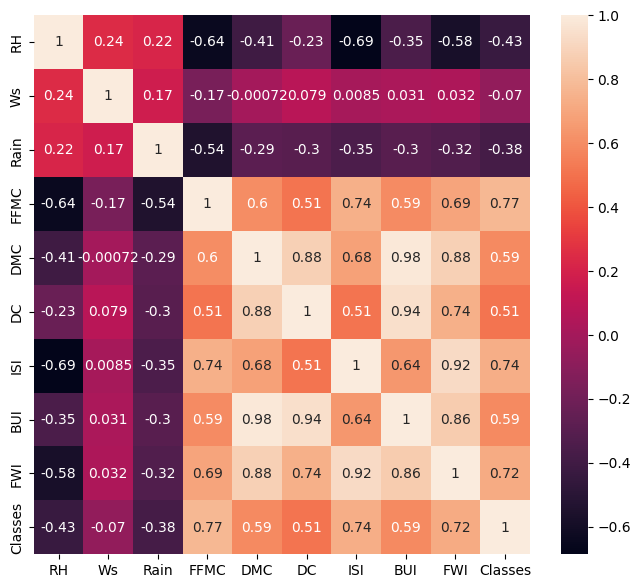

In [258]:
fig, ax=plt.subplots(figsize=(8,7))
sns.heatmap(X.corr(),annot=True,ax=ax)

In [259]:
ip_feature=X.drop(columns=['DMC','DC'],axis=1)
ip_feature

,RH,Ws,Rain,FFMC,ISI,BUI,FWI,Classes
0,57,18,0,65.7,1.3,3.4,0.5,0
1,61,13,1.3,64.4,1,3.9,0.4,0
2,82,22,13.1,47.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,0,1.7,0,0
4,77,16,0,64.8,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...
241,65,14,0,85.4,4.5,16.9,6.5,1
242,87,15,4.4,41.1,0.1,6.2,0,0
243,87,29,0.5,45.9,0.4,3.4,0.2,0
244,54,18,0.1,79.7,1.7,5.1,0.7,0


In [266]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(ip_feature,y,test_size=0.3,random_state=42)

In [272]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()
linear_model=linear.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1.965327182039987

In [273]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
mean_absolute_error(y_test,DT_pred)

2.315068493150685

In [274]:
from sklearn.ensemble import RandomForestRegressor

DT=RandomForestRegressor()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
mean_absolute_error(y_test,DT_pred)

1.8475342465753426

In [275]:
from sklearn.ensemble import GradientBoostingRegressor

DT=GradientBoostingRegressor()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
mean_absolute_error(y_test,DT_pred)

1.9271468778677414

In [276]:
from sklearn.ensemble import AdaBoostRegressor

DT=AdaBoostRegressor()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
mean_absolute_error(y_test,DT_pred)

1.905713119336494

In [277]:
from sklearn.svm import SVR

DT=SVR()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
mean_absolute_error(y_test,DT_pred)

1.896540374123885

In [278]:
from sklearn.neighbors import KNeighborsRegressor

DT=KNeighborsRegressor()
DT_model=DT.fit(X_train,y_train)
DT_pred=DT_model.predict(X_test)
mean_absolute_error(y_test,DT_pred)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Observation -1:

All the features are in Object data type
Overall 14 number of Features
2 records are having Null values